<a href="https://colab.research.google.com/github/20130297-PhamHoangKhuong/PhamHoangKhuong/blob/main/Lab_3_20130297_PhamHoangKhuong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The main aim of **Lab 3** is to deal with some basic techniques for **preprocessing data** and **Linear Regression using Scikit-learn** – a Python-based Machine Learning framework.

**Deadline: 23:59, 25/03/2024**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


#Import libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Task 1.
The main aim of this task is to get familiar with the tasks of preprocessing data using **Scikit-learn** – a Python-based Machine Learning framework and Linear Regression.


For given 2 datasets (**weather.csv, salary_dummy.csv**),
*   Identify issues with these datasets
*   Then, apply preprocessing techniques to the datasets


#Task 1.1. Dataset **weather.csv**

Identify **Issues** of the given dataset:


1.   List item
2.   List item
3.   List item
4.   List item
....



**Preprocessing dataset**:

In [3]:
#code
df = pd.read_csv("weather.csv")
df


,id,outlook,temperature,humidity,windy,play
0,1,sunny,85,85,False,no
1,2,sunny,80,90,True,no
2,3,overcast,83,86,False,yes
3,4,rainy,NaN,96,False,yes
4,5,rainy,68,80,False,yes
5,6,rainy,65,70,True,no
6,7,overcast,64,65,True,yes
7,8,sunny,72,95,False,no
8,9,sunny,69,NaN,False,yes
9,10,rainy,75,80,False,yes


In [4]:
#code
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df[['temperature', 'humidity']] = imputer.fit_transform(df[['temperature', 'humidity']])
df

,id,outlook,temperature,humidity,windy,play
0,1,sunny,85.000000,85.000000,False,no
1,2,sunny,80.000000,90.000000,True,no
2,3,overcast,83.000000,86.000000,False,yes
3,4,rainy,73.846154,96.000000,False,yes
4,5,rainy,68.000000,80.000000,False,yes
5,6,rainy,65.000000,70.000000,True,no
6,7,overcast,64.000000,65.000000,True,yes
7,8,sunny,72.000000,95.000000,False,no
8,9,sunny,69.000000,82.538462,False,yes
9,10,rainy,75.000000,80.000000,False,yes


#Task 1.2. Dataset **salary_dummy.csv**

Identify **Issues** of the given dataset:


1.   List item
2.   List item
3.   List item
4.   List item
....



**Preprocessing dataset**:
Impute missing values for features using **SimpleImputer**

In [5]:
#code
df = pd.read_csv("salary_dummy.csv")
df

,No,Country,Age,Salary,Purchased
0,1,France,44.0,72000.0,No
1,2,Spain,27.0,48000.0,Yes
2,3,Germany,30.0,54000.0,No
3,4,Spain,38.0,61000.0,No
4,5,Germany,40.0,NaN,Yes
5,6,France,35.0,58000.0,Yes
6,7,Spain,NaN,52000.0,No
7,8,France,48.0,79000.0,Yes
8,9,Germany,50.0,83000.0,No
9,10,France,37.0,67000.0,Yes


In [6]:
#code
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df[['Age', 'Salary']] = imputer.fit_transform(df[['Age', 'Salary']])
df

,No,Country,Age,Salary,Purchased
0,1,France,44.000000,72000.000000,No
1,2,Spain,27.000000,48000.000000,Yes
2,3,Germany,30.000000,54000.000000,No
3,4,Spain,38.000000,61000.000000,No
4,5,Germany,40.000000,63777.777778,Yes
5,6,France,35.000000,58000.000000,Yes
6,7,Spain,38.777778,52000.000000,No
7,8,France,48.000000,79000.000000,Yes
8,9,Germany,50.000000,83000.000000,No
9,10,France,37.000000,67000.000000,Yes


After imputing missing values for salary dataset, please apply **CATEGORICAL TO NUMERIC** for feature Country

In [7]:
#code
df['Country'].replace(['France', 'Spain', 'Germany'],[0, 1, 2], inplace=True)
df

,No,Country,Age,Salary,Purchased
0,1,0,44.000000,72000.000000,No
1,2,1,27.000000,48000.000000,Yes
2,3,2,30.000000,54000.000000,No
3,4,1,38.000000,61000.000000,No
4,5,2,40.000000,63777.777778,Yes
5,6,0,35.000000,58000.000000,Yes
6,7,1,38.777778,52000.000000,No
7,8,0,48.000000,79000.000000,Yes
8,9,2,50.000000,83000.000000,No
9,10,0,37.000000,67000.000000,Yes


# **Task 2**. Simple Linear Regression in Scikit-Learn
---
# **Usage:**
> **Step 1**: build a model
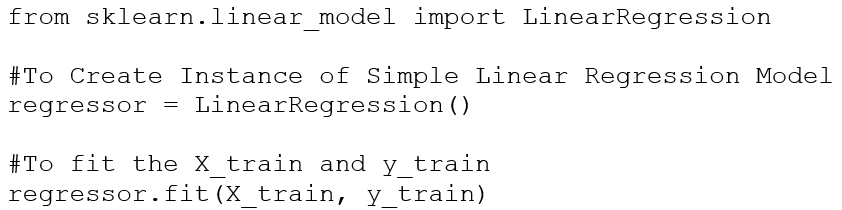

> **Step 2**: test the model

*   With test set:
`y_pred = regressor.predict(X_test)`

*   With a single value ("predict" method always expects a 2D array as the format of its inputs)
`regressor.predict([[12]])`

> **Step 3**:
*   get w0, w1 , w2, …,
-- W0: `regressor.intercept_`
-- w1, w2, …: `regressor.coef_`
*   R^2 score: sum of squared r(i)
`r(i) = y(i) - f(x(i))`: residual of ith instance


> **Metrics**:
*   metrics.explained_variance_score(y_test, y_pred)
*   metrics.mean_absolute_error(y_ test, y_pred)
*   metrics.mean_squared_error(y_ test, y_pred[, ...])
*   metrics.mean_squared_log_error(y_ test, y_pred)
*   metrics.median_absolute_error(y_ test, y_pred)
*   metrics.r2_score(y_ test, y_pred[, ...])




---



# Tasks
The main aim of these tasks is to get familiar with **Linear Regression** problems. Apply LinearRegression to the following datasets. Note **the error obtained, coefficients and values of metrics** as aforementioned.
*   **dataset1.csv** - a synthetic dataset including 5 points (1-dimensional data) with one target
*   **dataset2.csv** - a synthetic dataset including 1000 points (3-dimensional data) with one target variable. The variables are named x1, x2, x3, y. y is the variable to be regressed. Split the dataset into training set and test set (70% for training set and 30% for test set).


# Task 2.1. dataset1.csv


In [128]:
#code
df = pd.read_csv("dataset1.csv")
df


,x,y
0,1,1
1,2,3
2,4,3
3,3,2
4,5,5


In [129]:
#code
data = {
    "x": [1, 2, 4, 3, 5],
    "y": [1, 3, 3, 2, 5]
}
df = pd.DataFrame(data)

# Chọn features và target
X = df[["x"]]
y = df["y"]

In [130]:
#code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Để tạo một instance của mô hình hồi quy tuyến tính đơn giản
regressor = LinearRegression()

# Để phù hợp với X_train và y_train
regressor.fit(X, y)

y_pred = regressor.predict(X_test)
y_pred

r2 = metrics.r2_score(y_test, y_pred)
r2



0.3199999999999994

# Task 2.2. dataset2.csv


In [131]:
#code
df = pd.read_csv("dataset2.csv")
df.head(10)


,id,x1,x2,x3,y
0,1,2.41710,0.835950,0.72469,18.21900
1,2,1.98150,-1.018000,-1.06400,0.55271
2,3,1.82850,0.492810,-0.89035,7.00510
3,4,1.50480,-1.740700,-1.72290,-7.06310
4,5,0.27489,-0.318110,-0.56168,0.74380
5,6,-0.40564,-2.436600,1.97870,2.93010
6,7,-1.86440,-1.354900,1.93880,2.68150
7,8,0.77310,-1.181600,-0.53193,-1.06680
8,9,1.81980,0.056926,0.87729,14.07400
9,10,-1.12700,-1.424600,-1.23890,-11.27400


In [132]:
#code
X = df.drop(columns=['y'])
y = df['y']

In [133]:
#code
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Để tạo một instance của mô hình hồi quy tuyến tính đơn giản
regressor = LinearRegression()

# Để phù hợp với X_train và y_train
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred

r2 = metrics.r2_score(y_test, y_pred)
r2

0.9999999993243387

# Task 2.3. Apply LinearRegression to the following dataset:
*   Red wine quality: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv . The dataset includes info about the chemical properties of different types of wine and how they relate to overall quality.



In [150]:
#code
df = pd.read_csv("winequality-red.csv", sep=';')
df.head(10)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


*   **plot y_pred** and **y_test** to show the different between these values

In [151]:
#code
X = df.drop(columns=['quality'])
y = df['quality']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Để tạo một instance của mô hình hồi quy tuyến tính đơn giản
regressor = LinearRegression()

# Để phù hợp với X_train và y_train
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred

r2 = metrics.r2_score(y_test, y_pred)
r2

0.3513885332505231

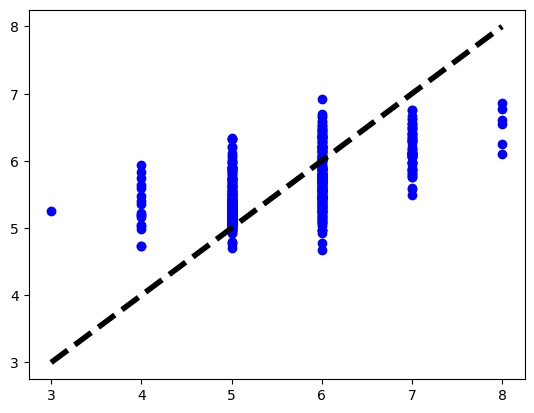

In [152]:
#code
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

# Task 2.4. Apply LinearRegression to the following dataset:
*   Energy efficiency: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency.




In [141]:
#code
df = pd.read_excel("ENB2012_data.xlsx")
df.head(10)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


*   **plot y_pred** and **y_test** to show the different between these values

In [146]:
#code
X = df.drop(columns=['Y1', 'Y2'])
y = df[['Y1', 'Y2']]

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Để tạo một instance của mô hình hồi quy tuyến tính đơn giản
regressor = LinearRegression()

# Để phù hợp với X_train và y_train
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred

r2 = metrics.r2_score(y_test, y_pred)
r2


0.9028145634342284

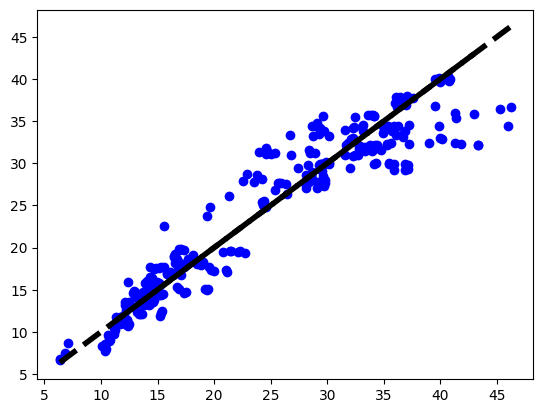

In [147]:
#code
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

# Finally,
Remember renaming the notebook.